# Modeling A Spread of an Infectious Disease

## SIR Model equation

Susceptible-Infected-Removed (SIR) is a classical differential equation model of infectious diseases. It divides the total population into three compartments and models their evolution by the system of equations

Imagine an infectious disease that spreads in a population of N individuals at any given time(t). According to the SIR model, an individual can be divided into 3 compartments.

Susceptible: Number of individuals who are not being exposed to the disease
Infected: Number of individuals who are exposed to the disease
Recovered: Number of individuals who are recovered from the disease

![Jupyter Logo](https://www.medrxiv.org/sites/default/files/highwire/medrxiv/early/2020/07/22/2020.07.20.20158568/embed/graphic-1.gif)

\begin{align*}
\Huge \frac{dS}{dt} &=\Huge -\beta \cdot \frac{S \cdot I}{N} \\
\Huge \frac{dI}{dt} &=\Huge \beta \cdot \frac{S \cdot I}{N} - \gamma \cdot I \\
\Huge \frac{dR}{dt} &=\Huge \gamma \cdot I
\end{align*}

These equations give us the rate of change between the number of susceptible people S(t), number of infected people R(t), and number of recovered people I(t) as a function of time(t). The three equations have two parameters, β contact rate, and γ recovery rate. Now we can numerically solve these equations for any set of inputs (N, β, γ). S, I, and R values as the initial conditions of the model.

In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

The initial population is N, the Initial number of infected and recovered individuals are I0 and R0 respectively. And the susceptible individuals to infection initially S0. Finally the contact rate (β) and average recovery rate (γ). Also, let's define the timeframe of the outbreak using a grid of time points using the NumPy linespace function

In [2]:
N = 1000

I0, R0 = 1, 0

S0 = N - I0 - R0

beta, gamma = 0.2, 1./10 

t = np.linspace(0, 200)

Now, let's add differential equations. To do so let’s define a function called deriv(you can give any name )to integrate the equations for given function parameters.

In [3]:
def deriv(y, t, N, beta, gamma):
    S, I, R = y
    dSdt = -beta * S * I / N
    dIdt = beta * S * I / N - gamma * I
    dRdt = gamma * I
    return dSdt, dIdt, dRdt

y0 = S0, I0, R0

ret = odeint(deriv, y0, t, args=(N, beta, gamma))
S, I, R = ret.T 

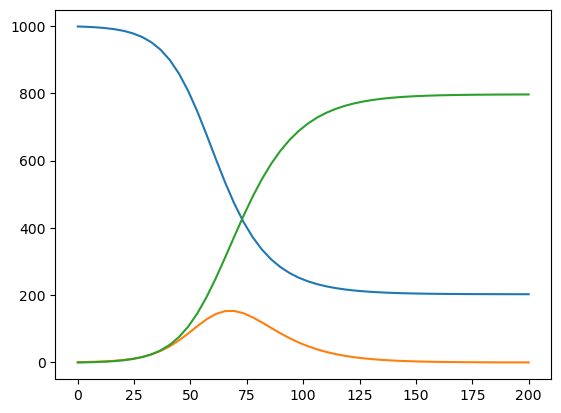

In [4]:
plt.plot(t,S)
plt.plot(t,I)
plt.plot(t,R)
plt.show()

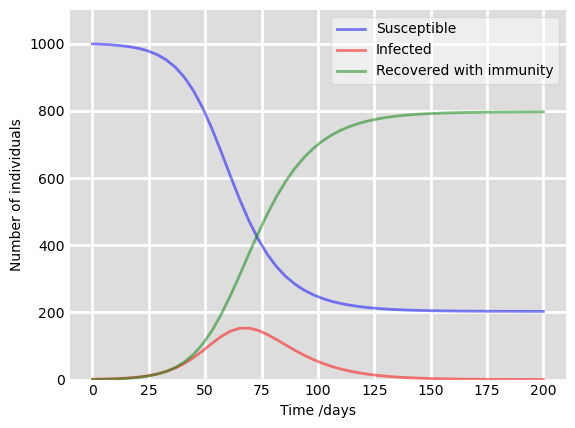

In [6]:
fig = plt.figure(facecolor='w')
ax = fig.add_subplot(111, facecolor='#dddddd', axisbelow=True)
ax.plot(t, S, 'b', alpha=0.5, lw=2, label='Susceptible')
ax.plot(t, I, 'r', alpha=0.5, lw=2, label='Infected')
ax.plot(t, R, 'g', alpha=0.5, lw=2, label='Recovered with immunity')
ax.set_xlabel('Time /days')
ax.set_ylabel('Number of individuals')
ax.set_ylim(0,1100)
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(which='major', c='w', lw=2, ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
plt.show()